In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
import sklearn.metrics as metrics
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('readyForModelisation2.xlsx',index_col=0)
pd.set_option('display.max_columns',88)

In [3]:
from sklearn.compose import make_column_selector
categorical=make_column_selector(dtype_exclude=np.number)
numerical=make_column_selector(dtype_include=np.number)
x=df[categorical]

In [4]:
df.replace(999,np.nan,inplace=True)
df.replace(11,np.nan,inplace=True)

# Decomosing dataframe into 4 services

In [5]:
StoreEval=df[['Info_Facility_Understand_numeric', 'Visit_Eval_numeric',
       'Store_Staff_numeric', 'Request_Comprehension_numeric',
       'Proposed_solution_in_Store_numeric',
       'privileged welcome as a business customer_numeric','Waiting_Time_in_Store',
        'Commercial_Eval','Time_Before_talk','commercial_understanding','commercial_solution','Visit_Eval.1',
            ]]


AppelEval=df[['Network_Quality','Rate_SOS',
       'Call_efficiency', 'Network_Coverage', 'Call_Voice_Quality',
       'Communication_Quality', 'Voice_Comm_Inside', 'Voice_Comm_Outside',
             'Rate_Conf_Call', 'Rate_Voice_Message']]


InternetEval=df[['Quality_Internet_Connection',
       'Mob_Internet_Accessibility', 'Navigation_Speed_Mobile',
       'Price_Quality_Mob_Int','Rate_Trans_Internet']]

RoamingEval=df[['Rate_Roaming_Service', 'Network_Accessibility', 'Quality_Voice',
       'Quality_Mobile_Internet', 'Info_cost_Roaming_Service',
       'Cost_Roaming_Service']]



In [6]:
df_clean=df.drop([  'Info_Facility_Understand_numeric', 'Visit_Eval_numeric',
       'Store_Staff_numeric', 'Request_Comprehension_numeric',
       'Proposed_solution_in_Store_numeric',
       'privileged welcome as a business customer_numeric','Waiting_Time_in_Store',
        'Commercial_Eval','Time_Before_talk','commercial_understanding','commercial_solution','Visit_Eval.1','Network_Quality','Rate_SOS',
       'Call_efficiency', 'Network_Coverage', 'Call_Voice_Quality',
       'Communication_Quality', 'Voice_Comm_Inside', 'Voice_Comm_Outside',
             'Rate_Conf_Call', 'Rate_Voice_Message','Quality_Internet_Connection',
       'Mob_Internet_Accessibility', 'Navigation_Speed_Mobile',
       'Price_Quality_Mob_Int','Rate_Trans_Internet','Rate_Roaming_Service', 'Network_Accessibility', 'Quality_Voice',
       'Quality_Mobile_Internet', 'Info_cost_Roaming_Service',
       'Cost_Roaming_Service'],axis=1,errors='ignore')

In [7]:
df_clean['Appel_score']=AppelEval.mean(axis=1)
df_clean['Roamnig_score']=RoamingEval.mean(axis=1)
df_clean['Internet_score']=InternetEval.mean(axis=1)
df_clean['Store_score']=StoreEval.mean(axis=1)
df_clean['note']=df_clean.mean(axis=1)
AppelEval['Appel_score']=AppelEval.mean(axis=1)
RoamingEval['Roamnig_score']=RoamingEval.mean(axis=1)
InternetEval['Internet_score']=InternetEval.mean(axis=1)
StoreEval['store_score']=StoreEval.mean(axis=1)


# Dummies 

In [8]:
y_appel=df_clean['Appel_score'] 
y_roaming=df_clean['Roamnig_score'] 
y_internet=df_clean['Internet_score']  
y_store=df_clean['Store_score'] 
y_note=df_clean['note']

In [9]:
status = pd.get_dummies(x,drop_first=True)

In [10]:
df_clean= pd.concat([y_appel,y_roaming,y_internet,y_store,status],axis=1)

In [11]:
AppelEval=pd.concat([AppelEval['Appel_score'],status],axis=1)
RoamingEval=pd.concat([RoamingEval['Roamnig_score'],status],axis=1)
InternetEval=pd.concat([InternetEval['Internet_score'],status],axis=1)

In [12]:
StoreEval.dropna(inplace=True)

after dropping nan values we had only 6 rows 

##   Defining feature and target variables

In [13]:
# Putting feature variable to X
X = df_clean[[ 'city_SFAX', 'city_TUNIS',
       'Sect_Comp_Assurances', 'Sect_Comp_Banque', 'Sect_Comp_Commerce',
        'Sect_Comp_Industrie', 'Sect_Comp_Santé',
       'Sect_Comp_Services', 'Sect_Comp_Tourisme', 'Opert_Princ_Orange',
       'Opert_Princ_Tunisie Télécom', 'Opert_Period_2 ans à moins de 3 ans',
       'Opert_Period_3 ans ou plus', 
       'Opert_Period_6 mois à moins de 12 mois',
       
       'Abonnement_Orange_ Certains ou tous les employés ont leur propre abonnement  mobile et ne se font pas rembourser du tout leur facture par votre entreprise',
       'Abonnement_Orange_ Certains ou tous les employés ont souscrit leur propre abonnement  mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise',
       'Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.',
       'Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise',
       'Abonnement_Ooredoo_ Certains ou tous les employés ont leur propre abonnement  mobile et ne se font pas rembourser du tout leur facture par votre entreprise',
       
       'Abonnement_Ooredoo_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.',
       'Abonnement_Ooredoo_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise',
  
       'Abonnement_Telecom_ Certains ou tous les employés ont souscrit leur propre abonnement  mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise',
       'Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.',
       'Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise',
       'Opert_Princ_Type_Offer_Offre mobile postpayé',
       'Opert_Princ_Type_Offer_Offre mobile postpayée avec tarif préférentiel intra-flotte',
       'Opert_Princ_Type_Offer_Offre mobile prépayée',
       'Opert_Princ_Type_Offer_Offre mobile prépayée avec tarif préférentiel intra-flotte',
       ]]


## Defining a normalisation function 

In [14]:
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))

AppelEval=AppelEval.apply(normalize)
RoamingEval=RoamingEval.apply(normalize)
InternetEval=InternetEval.apply(normalize)

## Defining evaluation function to evaluate our models

In [15]:
def evaluate(model):
   
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    explained_variance=metrics.explained_variance_score(y_test, ypred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, ypred)
    mse=metrics.mean_squared_error(y_test, ypred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, ypred)
    median_absolute_error=metrics.median_absolute_error(y_test, ypred)
    r2=metrics.r2_score(y_test, ypred)
    print(model.__class__.__name__)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    
    sns.regplot(y_test,ypred)
    c = [i for i in range(1,len(y_test)+1,1)]
    plt.subplot(1,2,2)
    plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,ypred, color="red",  linewidth=2.5, linestyle="-") 
    plt.suptitle('Actual and Predicted', fontsize=20)             
    plt.xlabel('Test Set', fontsize=18)                           
    plt.ylabel('target', fontsize=16) 
    plt.show()

# Selecting best features for Roaming Service

In [16]:
from sklearn.feature_selection import RFE
model = RandomForestRegressor()
rfe = RFE(model, 25)
fit = rfe.fit(X, y_roaming)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 25
Selected Features: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True False  True  True
  True  True  True  True]
Feature Ranking: [1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 2 1 1 1 1 1 1]


In [17]:
bestcols_roaming=X[X.columns[fit.support_]]

## Splitting Data into Training and Testing Sets for Roaming_Service

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bestcols_roaming, y_roaming, train_size=0.8 , random_state=43)

### Roaming_Score Predicting using Random Forest

In [19]:
# regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8,58,50,200],
    
# }
# grid_regressor = GridSearchCV(estimator=regressor, param_grid=param_grid, cv= 5)
# grid_regressor.fit(X_train, y_train)

RandomForestRegressor
explained_variance:  0.5519
mean_squared_log_error:  0.0069
r2:  0.5518
MAE:  0.2116
MSE:  0.2152
RMSE:  0.4639


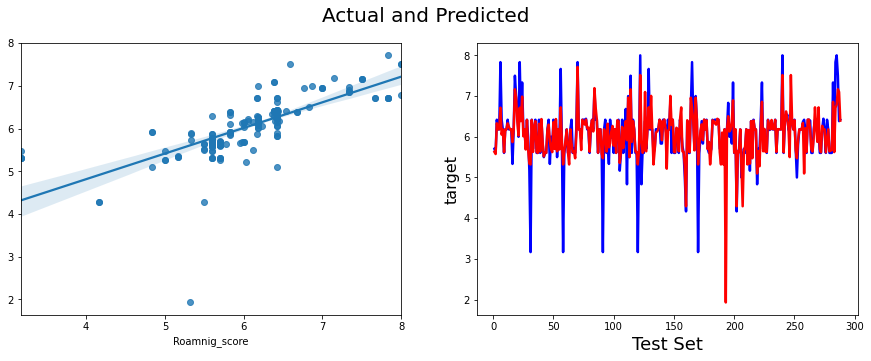

In [20]:
gridRandom=RandomForestRegressor(max_depth=58, max_features='sqrt', n_estimators=500,random_state=0)
gridRandom.fit(X_train,y_train)
evaluate(gridRandom)
testRandom=gridRandom.score(X_test,y_test)
trainRandom=gridRandom.score(X_train,y_train)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_roaming, train_size=0.8 , random_state=43)

## KNeighborsRegressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor
parameters = {'n_neighbors': (1,99, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

knn = KNeighborsRegressor()
gridKnn = GridSearchCV(knn, parameters,cv=5)

GridSearchCV
explained_variance:  0.53
mean_squared_log_error:  0.0072
r2:  0.5298
MAE:  0.2102
MSE:  0.2258
RMSE:  0.4752


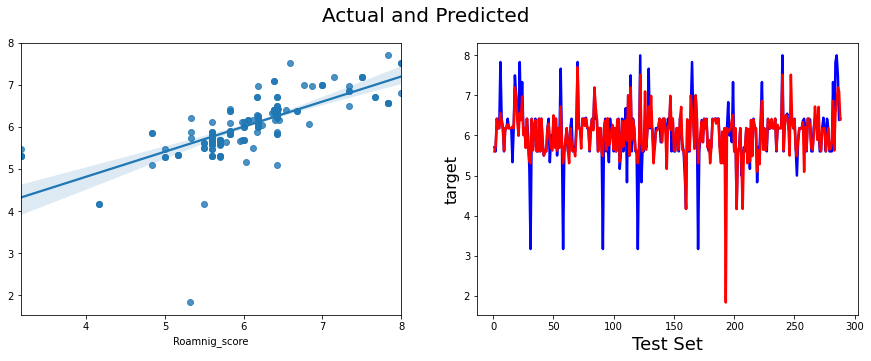

In [23]:
gridKnn.fit(X_train,y_train)
evaluate(gridKnn)
testKnn=gridKnn.score(X_test,y_test)
trainKnn=gridKnn.score(X_train,y_train)

Best Score: 0.7693065197053907
KNeighborsRegressor
explained_variance:  0.53
mean_squared_log_error:  0.0072
r2:  0.5298
MAE:  0.2102
MSE:  0.2258
RMSE:  0.4752


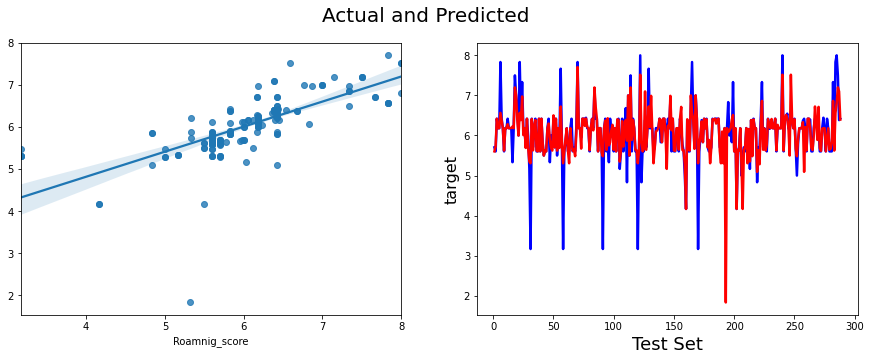

In [24]:
print('Best Score: '+str(gridKnn.best_score_))
evaluate(gridKnn.best_estimator_)

## BaggingRegressor

In [25]:
# from sklearn.ensemble import BaggingRegressor
# bag=BaggingRegressor(random_state=42)
# param_grid = { 'max_samples': [i for i in range(1,50)],
#                'max_features': [i for i in range(1,250)]
#                }
# gridBag = GridSearchCV(estimator= bag, param_grid= param_grid, n_jobs=-1)
# gridBag.fit(X_train, y_train)

In [20]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(random_state=42)
bag.fit(X_train, y_train)
testbag=bag.score(X_test,y_test)
trainbag=bag.score(X_train,y_train)

In [27]:
# gridBag.fit(X_train,y_train)
# gridBag.best_estimator_

BaggingRegressor
explained_variance:  0.6058
mean_squared_log_error:  0.0064
r2:  0.6057
MAE:  0.189
MSE:  0.1893
RMSE:  0.4351


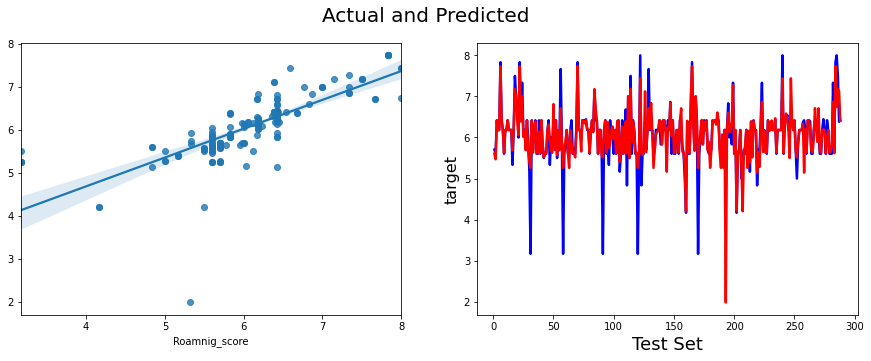

In [21]:

evaluate(bag)

## VotingRegressor

VotingRegressor
explained_variance:  0.5484
mean_squared_log_error:  0.006
r2:  0.5484
MAE:  0.2531
MSE:  0.2169
RMSE:  0.4657


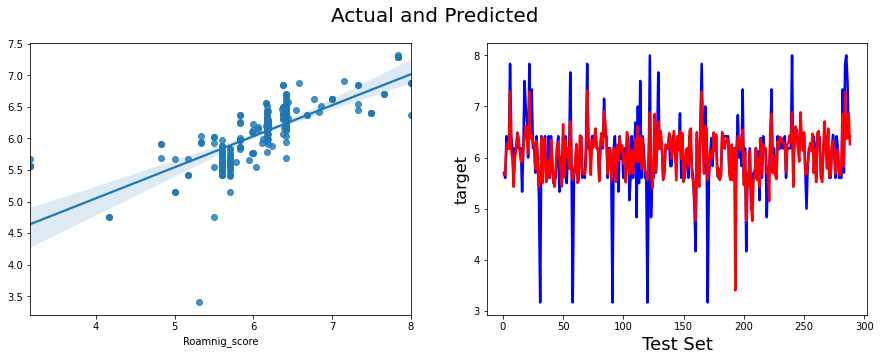

In [29]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
vot=VotingRegressor([('lr', r1), ('rf', r2)])
vot.fit(X_train, y_train)
evaluate(vot)
testvot=vot.score(X_test,y_test)
trainvot=vot.score(X_train,y_train)

## StackingRegressor

StackingRegressor
explained_variance:  0.3139
mean_squared_log_error:  0.0083
r2:  0.313
MAE:  0.3262
MSE:  0.3299
RMSE:  0.5744


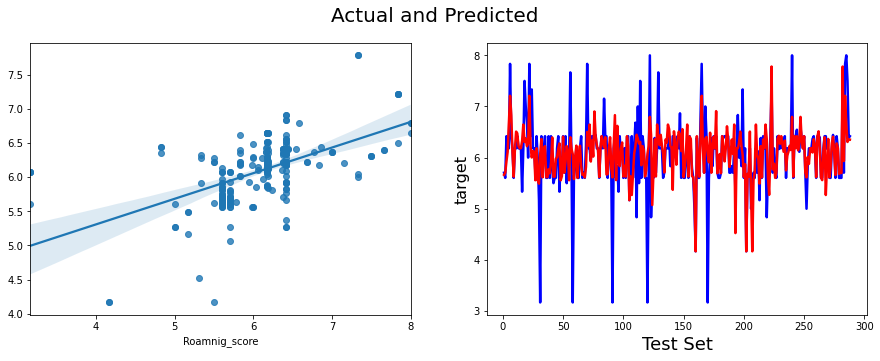

In [30]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]
Stackingreg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
evaluate(Stackingreg)
testStackingreg=Stackingreg.score(X_test,y_test)
trainStackingreg=Stackingreg.score(X_train,y_train)

## ExtraTreesRegressor

ExtraTreesRegressor
explained_variance:  0.5707
mean_squared_log_error:  0.0069
r2:  0.5704
MAE:  0.1924
MSE:  0.2063
RMSE:  0.4542


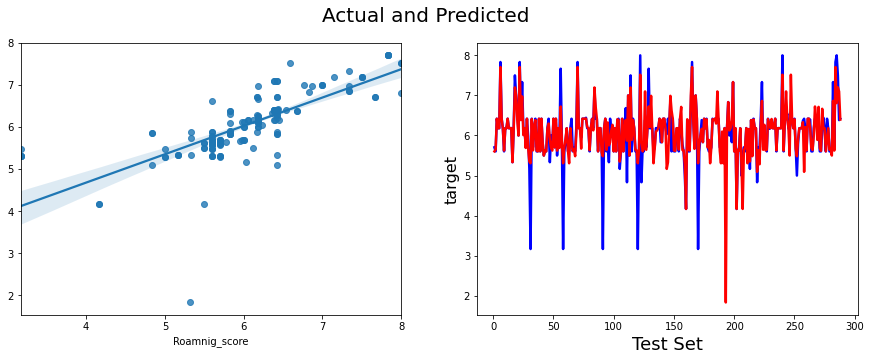

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(X_train, y_train)
evaluate(ext)
testext=ext.score(X_test,y_test)
trainext=ext.score(X_train,y_train)

## XGBRegressor

In [32]:
from xgboost import XGBRegressor
xgboost_1 = XGBRegressor(random_state=0)

xgboost_1.fit(X_train, y_train)
xgboost_1.predict(X_test)
xgboost_1.score(X_test,y_test)
testxgboost_1=xgboost_1.score(X_test,y_test)
trainxgboost_1=xgboost_1.score(X_train,y_train)

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate' : [0.1, 0.08, 0.05, 0.03, 0.01], 'n_estimators' : [50, 100, 200, 500, 700, 1000]}
grid = GridSearchCV(XGBRegressor(), param_grid, cv = 5)

grid.fit(X_train, y_train)
testxgboost_1=xgboost_1.score(X_test,y_test)
trainxgboost_1=xgboost_1.score(X_train,y_train)

# Selecting best features for Appel Service

In [22]:
from sklearn.feature_selection import RFE
model = RandomForestRegressor()
rfe = RFE(model, 25)
fit = rfe.fit(X, y_appel)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 25
Selected Features: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True False  True  True]
Feature Ranking: [1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 2 1 1]


In [23]:
bestcols_appel=X[X.columns[fit.support_]]

## Splitting Data into Training and Testing Sets for Roaming_Service

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bestcols_appel, y_appel, train_size=0.8 , random_state=43)

### Roaming_Score Predicting using Random Forest

In [37]:
# regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8,58,50,200],
    
# }
# grid_regressor = GridSearchCV(estimator=regressor, param_grid=param_grid, cv= 5)
# grid_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 58, 50, 200],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

Best Score: 0.7552894305382728
RandomForestRegressor
explained_variance:  0.6349
mean_squared_log_error:  0.0085
r2:  0.6329
MAE:  0.4202
MSE:  0.3869
RMSE:  0.622


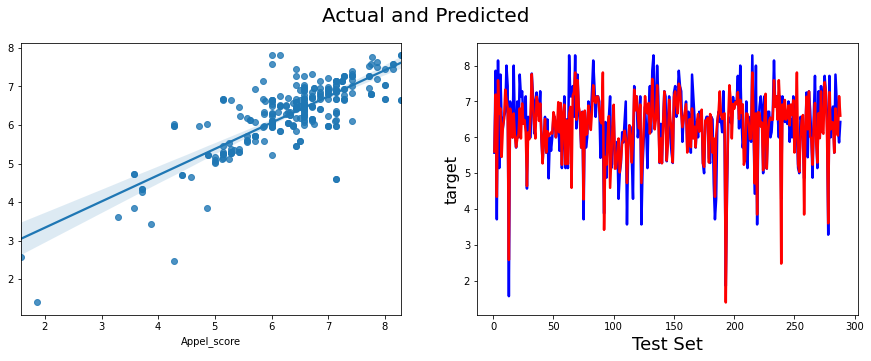

In [38]:
# gridRandom=RandomForestRegressor(max_depth=58, max_features='sqrt', n_estimators=500,random_state=0)
# print('Best Score: '+str(grid_regressor.best_score_))
# evaluate(gridRandom)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_appel, train_size=0.8 , random_state=43)

## KNeighborsRegressor

In [40]:
from sklearn.neighbors import KNeighborsRegressor
parameters = {'n_neighbors': (1,99, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

knn = KNeighborsRegressor()
gridKnn = GridSearchCV(knn, parameters,cv=5)

In [41]:
gridKnn.fit(X_train,y_train)
gridKnn.best_estimator_

KNeighborsRegressor(leaf_size=40, n_neighbors=99, p=1, weights='distance')

Best Score: 0.48462913764340776
KNeighborsRegressor
explained_variance:  0.6306
mean_squared_log_error:  0.0082
r2:  0.6279
MAE:  0.4117
MSE:  0.3921
RMSE:  0.6262


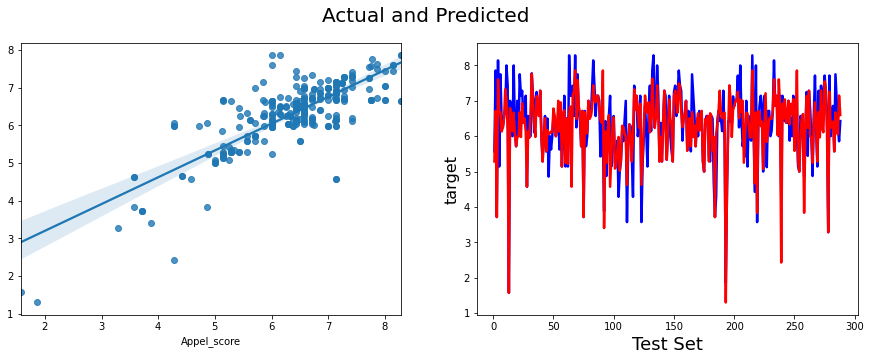

In [107]:
print('Best Score: '+str(gridKnn.best_score_))
evaluate(gridKnn.best_estimator_)
testKnn=gridKnn.score(X_test,y_test)
trainKnn=gridKnn.score(X_train,y_train)

## BaggingRegressor

In [43]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(random_state=42)
param_grid = { 'max_samples': [i for i in range(1,50)],
               'max_features': [i for i in range(1,250)]
               }
gridBag = GridSearchCV(estimator= bag, param_grid= param_grid, n_jobs=-1)
gridBag.fit(X_train, y_train)

GridSearchCV(estimator=BaggingRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [44]:
gridBag.fit(X_train,y_train)
gridBag.best_estimator_

BaggingRegressor(max_features=28, max_samples=48, random_state=42)

BaggingRegressor
explained_variance:  0.6557
mean_squared_log_error:  0.0077
r2:  0.6538
MAE:  0.4037
MSE:  0.3649
RMSE:  0.6041


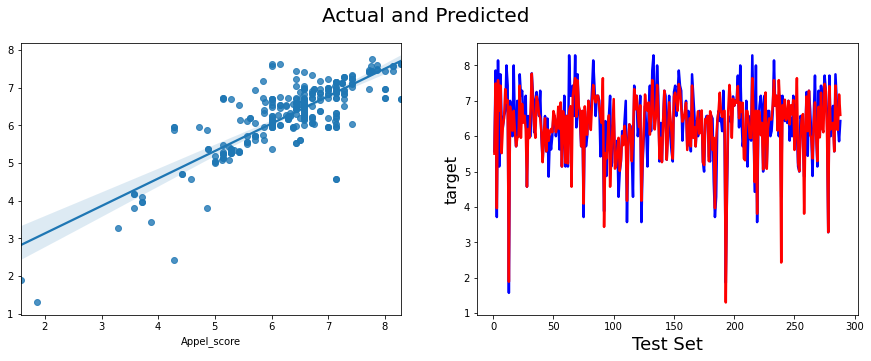

In [27]:
# print('Best Score: '+str(grid_regressor.best_score_))
bag=BaggingRegressor(random_state=45)
evaluate(bag)
testbag=bag.score(X_test,y_test)
trainbag=bag.score(X_train,y_train)

## VotingRegressor

VotingRegressor
explained_variance:  0.5708
mean_squared_log_error:  0.0109
r2:  0.5689
MAE:  0.526
MSE:  0.4544
RMSE:  0.6741


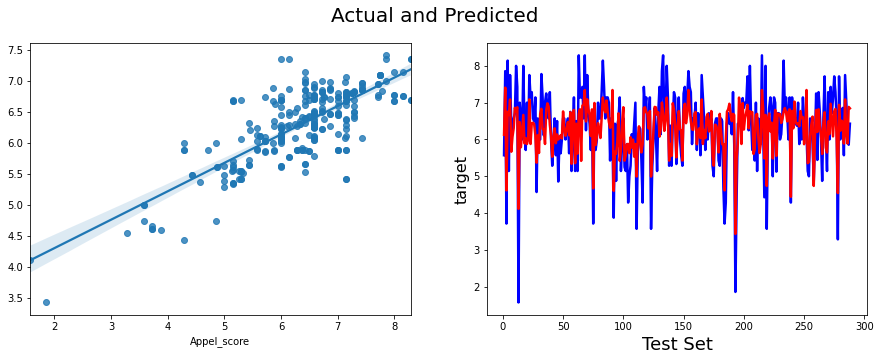

In [109]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
vot=VotingRegressor([('lr', r1), ('rf', r2)])
vot.fit(X_train, y_train)
evaluate(vot)
testvot=vot.score(X_test,y_test)
trainvot=vot.score(X_train,y_train)

## StackingRegressor

StackingRegressor
explained_variance:  0.2302
mean_squared_log_error:  0.0194
r2:  0.2187
MAE:  0.695
MSE:  0.8235
RMSE:  0.9075


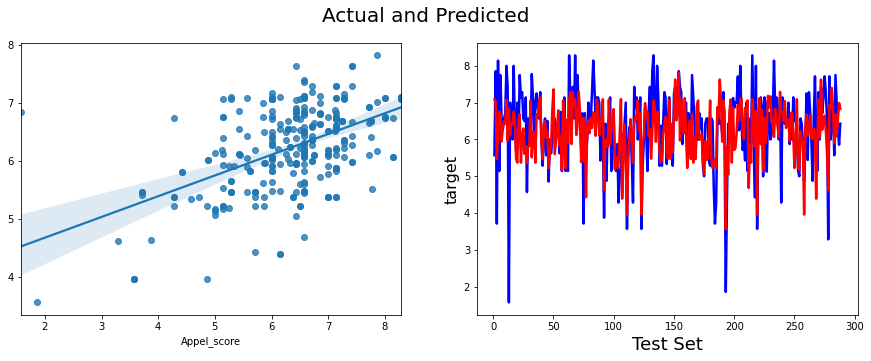

In [110]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]
Stackingreg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
evaluate(Stackingreg)
testStackingreg=Stackingreg.score(X_test,y_test)
trainStackingreg=Stackingreg.score(X_train,y_train)

## ExtraTreesRegressor

ExtraTreesRegressor
explained_variance:  0.6505
mean_squared_log_error:  0.0079
r2:  0.6489
MAE:  0.3879
MSE:  0.37
RMSE:  0.6083


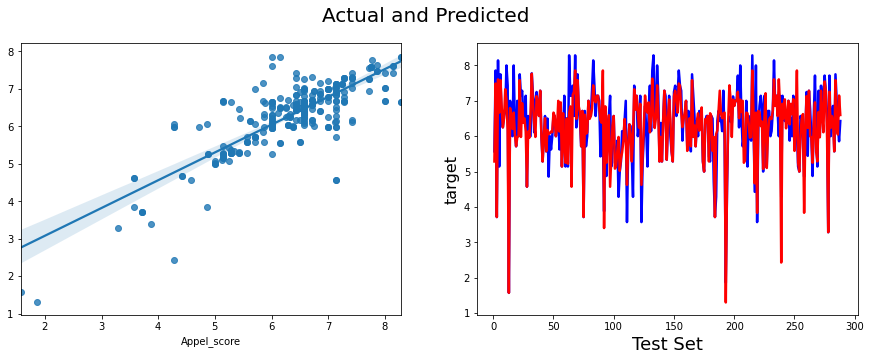

In [111]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(X_train, y_train)
evaluate(ext)
testext=ext.score(X_test,y_test)
trainext=ext.score(X_train,y_train)

## XGBRegressor

In [112]:
from xgboost import XGBRegressor
xgboost_1 = XGBRegressor(random_state=0)

xgboost_1.fit(X_train, y_train)
xgboost_1.predict(X_test)
xgboost_1.score(X_test,y_test)
testxgboost_1=xgboost_1.score(X_test,y_test)
trainxgboost_1=xgboost_1.score(X_train,y_train)

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate' : [0.1, 0.08, 0.05, 0.03, 0.01], 'n_estimators' : [50, 100, 200, 500, 700, 1000]}
grid = GridSearchCV(XGBRegressor(), param_grid, cv = 5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [51]:
grid.best_score_

0.7491658656231783

In [52]:
grid.best_params_

{'learning_rate': 0.05, 'n_estimators': 1000}

In [53]:
grid.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
XgboostBest=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Selecting best features for Internet Service

In [29]:
from sklearn.feature_selection import RFE
model = RandomForestRegressor()
rfe = RFE(model, 25)
fit = rfe.fit(X, y_internet)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 25
Selected Features: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True False  True  True
  True  True  True  True]
Feature Ranking: [1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 2 1 1 1 1 1 1]


In [30]:
bestcols_internet=X[X.columns[fit.support_]]

## Splitting Data into Training and Testing Sets for Roaming_Service

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bestcols_internet, y_internet, train_size=0.75 , random_state=43)

### Roaming_Score Predicting using Random Forest

RandomForestRegressor
explained_variance:  0.4854
mean_squared_log_error:  0.0107
r2:  0.4831
MAE:  0.309
MSE:  0.4032
RMSE:  0.635


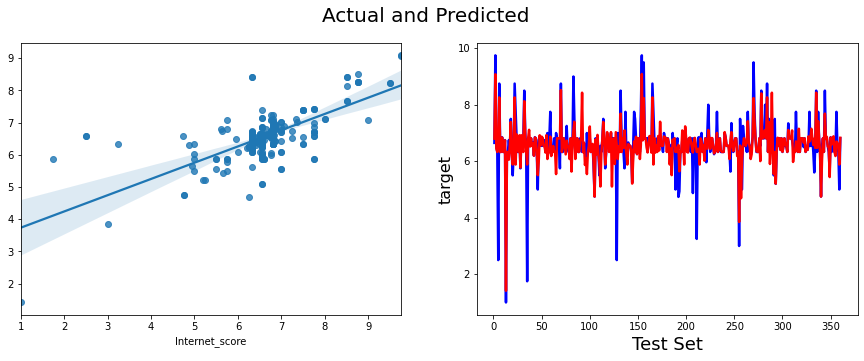

In [36]:
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor.fit(X_train, y_train)
evaluate(regressor)

In [37]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,58,50,200],
    
}
grid_regressor = GridSearchCV(estimator=regressor, param_grid=param_grid, cv= 5)
grid_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 58, 50, 200],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

Best Score: 0.41969026953542465
RandomForestRegressor
explained_variance:  0.4272
mean_squared_log_error:  0.0119
r2:  0.4216
MAE:  0.3374
MSE:  0.4512
RMSE:  0.6717


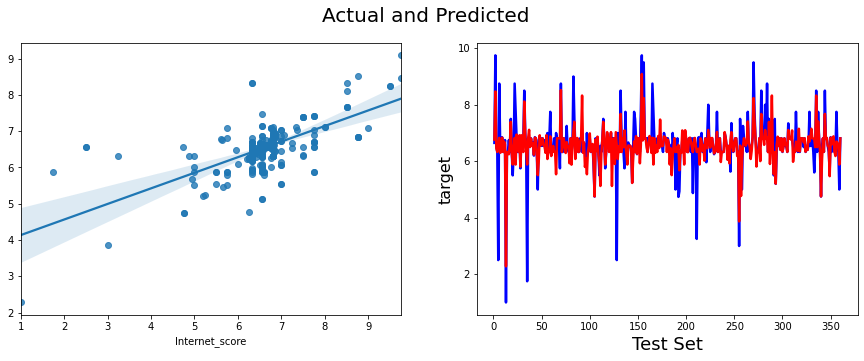

In [38]:
gridRandom=RandomForestRegressor(max_depth=58, max_features='sqrt', n_estimators=500,random_state=0)
print('Best Score: '+str(grid_regressor.best_score_))
evaluate(gridRandom)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_internet, train_size=0.8 , random_state=43)

## KNeighborsRegressor

In [58]:
from sklearn.neighbors import KNeighborsRegressor
parameters = {'n_neighbors': (1,99, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

knn = KNeighborsRegressor()
gridKnn = GridSearchCV(knn, parameters,cv=5)

In [59]:
gridKnn.fit(X_train,y_train)
gridKnn.best_estimator_

KNeighborsRegressor(leaf_size=40, n_neighbors=99, p=1, weights='distance')

Best Score: 0.37217897491258856
KNeighborsRegressor
explained_variance:  0.3959
mean_squared_log_error:  0.0137
r2:  0.3872
MAE:  0.3454
MSE:  0.5391
RMSE:  0.7343


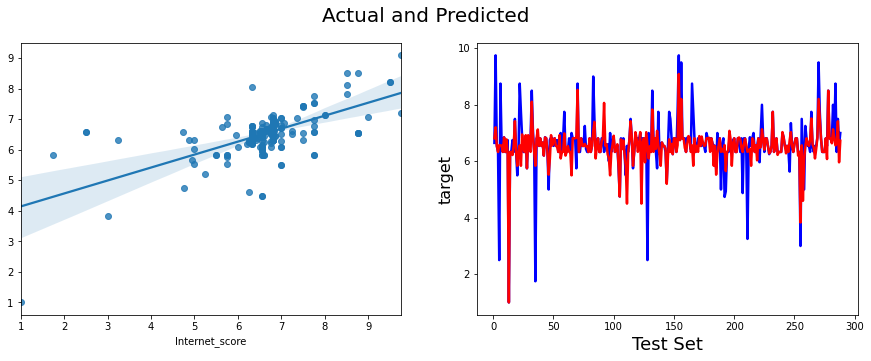

In [60]:
print('Best Score: '+str(gridKnn.best_score_))
evaluate(gridKnn.best_estimator_)

## BaggingRegressor

In [61]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(random_state=42)
param_grid = { 'max_samples': [i for i in range(1,50)],
               'max_features': [i for i in range(1,250)]
               }
gridBag = GridSearchCV(estimator= bag, param_grid= param_grid, n_jobs=-1)
gridBag.fit(X_train, y_train)

GridSearchCV(estimator=BaggingRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [62]:
gridBag.fit(X_train,y_train)
gridBag.best_estimator_

BaggingRegressor(max_features=21, max_samples=46, random_state=42)

Best Score: 0.1155923545027214
BaggingRegressor
explained_variance:  0.0749
mean_squared_log_error:  0.0221
r2:  0.0559
MAE:  0.5549
MSE:  0.8306
RMSE:  0.9113


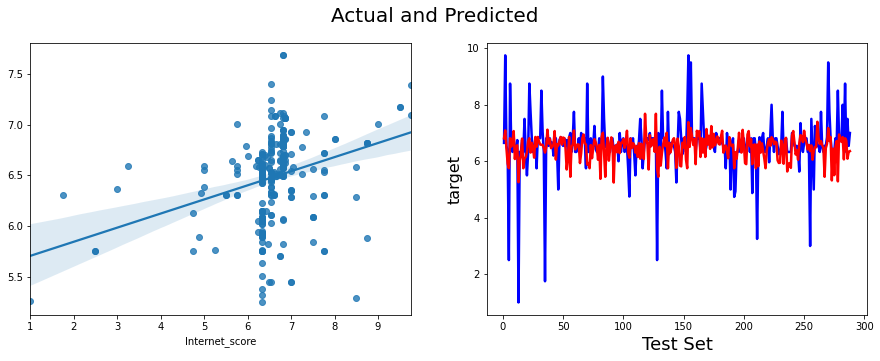

In [63]:
print('Best Score: '+str(gridBag.best_score_))
evaluate(gridBag.best_estimator_)

## VotingRegressor

VotingRegressor
explained_variance:  0.3825
mean_squared_log_error:  0.0164
r2:  0.3779
MAE:  0.4005
MSE:  0.5473
RMSE:  0.7398


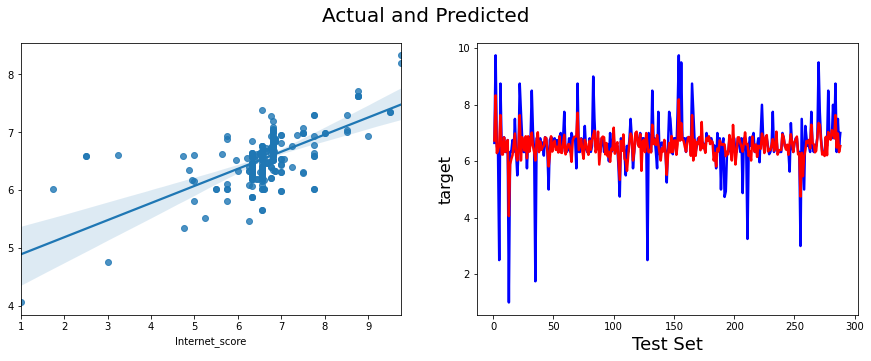

In [64]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
vot=VotingRegressor([('lr', r1), ('rf', r2)])
vot.fit(X_train, y_train)
evaluate(vot)

## StackingRegressor

StackingRegressor
explained_variance:  0.0037
mean_squared_log_error:  0.0242
r2:  0.0026
MAE:  0.5372
MSE:  0.8774
RMSE:  0.9367


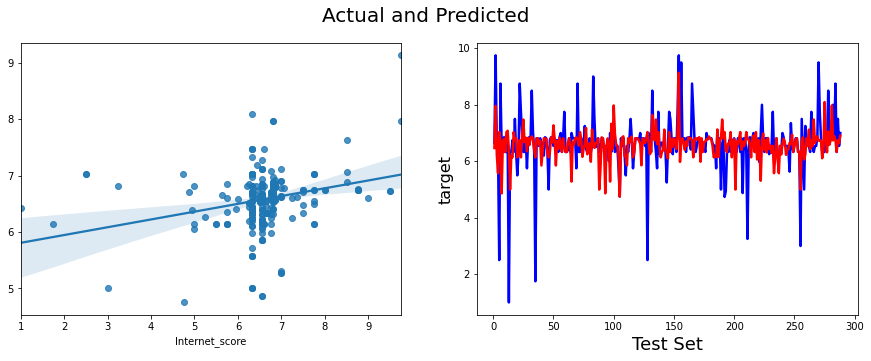

In [65]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]
Stackingreg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
evaluate(Stackingreg)

## ExtraTreesRegressor

ExtraTreesRegressor
explained_variance:  0.4779
mean_squared_log_error:  0.0128
r2:  0.475
MAE:  0.3161
MSE:  0.4618
RMSE:  0.6796


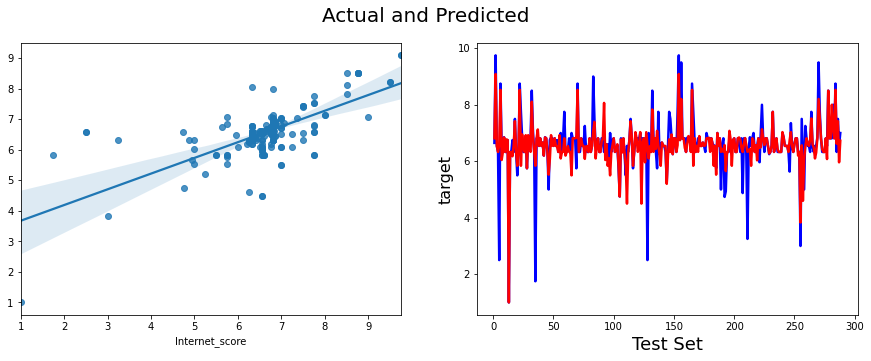

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(X_train, y_train)
evaluate(ext)

## XGBRegressor

In [67]:
from xgboost import XGBRegressor
xgboost_1 = XGBRegressor(random_state=0)

xgboost_1.fit(X_train, y_train)
xgboost_1.predict(X_test)
xgboost_1.score(X_test,y_test)

0.47450574267106627

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate' : [0.1, 0.08, 0.05, 0.03, 0.01], 'n_estimators' : [50, 100, 200, 500, 700, 1000]}
grid = GridSearchCV(XGBRegressor(), param_grid, cv = 5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [69]:
grid.best_score_

0.42516572716675416

In [70]:
grid.best_params_

{'learning_rate': 0.05, 'n_estimators': 200}

In [ ]:
grid.best_estimator_


In [ ]:
XgboostBest=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Selecting best features for Global Score

In [71]:
from sklearn.feature_selection import RFE
model = RandomForestRegressor()
rfe = RFE(model, 25)
fit = rfe.fit(X, y_note)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 25
Selected Features: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True False  True  True]
Feature Ranking: [1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 3 1 1]


In [72]:
bestcols_note=X[X.columns[fit.support_]]

## Splitting Data into Training and Testing Sets for Roaming_Service

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bestcols_note, y_note, train_size=0.8 , random_state=43)

### Roaming_Score Predicting using Random Forest

In [74]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,58,50,200],
    
}
grid_regressor = GridSearchCV(estimator=regressor, param_grid=param_grid, cv= 5)
grid_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 58, 50, 200],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

Best Score: 0.5367188400532843
RandomForestRegressor
explained_variance:  0.5606
mean_squared_log_error:  0.002
r2:  0.5601
MAE:  2.2864
MSE:  10.0582
RMSE:  3.1715


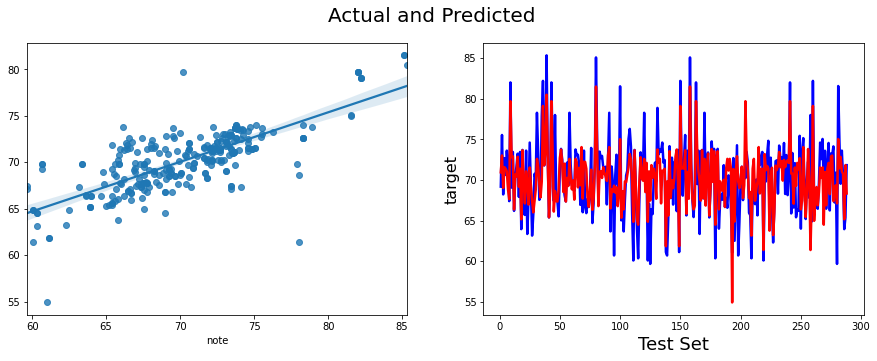

In [75]:
gridRandom=RandomForestRegressor(max_depth=58, max_features='sqrt', n_estimators=500,random_state=0)
print('Best Score: '+str(grid_regressor.best_score_))
evaluate(gridRandom)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_note, train_size=0.8 , random_state=43)

## KNeighborsRegressor

In [77]:
from sklearn.neighbors import KNeighborsRegressor
parameters = {'n_neighbors': (1,99, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

knn = KNeighborsRegressor()
gridKnn = GridSearchCV(knn, parameters,cv=5)

In [78]:
gridKnn.fit(X_train,y_train)
gridKnn.best_estimator_

KNeighborsRegressor(leaf_size=1, n_neighbors=99, p=1, weights='distance')

Best Score: 0.48462913764340776
KNeighborsRegressor
explained_variance:  0.5088
mean_squared_log_error:  0.0023
r2:  0.5082
MAE:  2.3554
MSE:  11.2445
RMSE:  3.3533


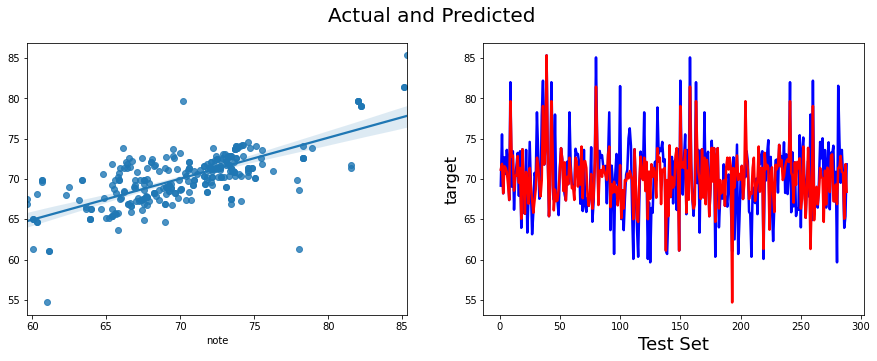

In [79]:
print('Best Score: '+str(gridKnn.best_score_))
evaluate(gridKnn.best_estimator_)

## BaggingRegressor

In [80]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(random_state=42)
param_grid = { 'max_samples': [i for i in range(1,50)],
               'max_features': [i for i in range(1,250)]
               }
gridBag = GridSearchCV(estimator= bag, param_grid= param_grid, n_jobs=-1)
gridBag.fit(X_train, y_train)

GridSearchCV(estimator=BaggingRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [81]:
gridBag.fit(X_train,y_train)
gridBag.best_estimator_

BaggingRegressor(max_features=25, max_samples=47, random_state=42)

Best Score: 0.15071360632941325
BaggingRegressor
explained_variance:  0.2181
mean_squared_log_error:  0.0034
r2:  0.2181
MAE:  3.2071
MSE:  17.8768
RMSE:  4.2281


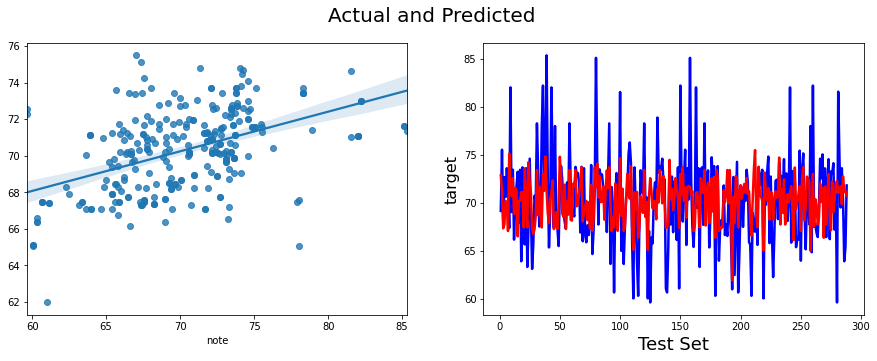

In [82]:
print('Best Score: '+str(gridBag.best_score_))
evaluate(gridBag.best_estimator_)

## VotingRegressor

VotingRegressor
explained_variance:  0.5094
mean_squared_log_error:  0.0022
r2:  0.5094
MAE:  2.6236
MSE:  11.216
RMSE:  3.349


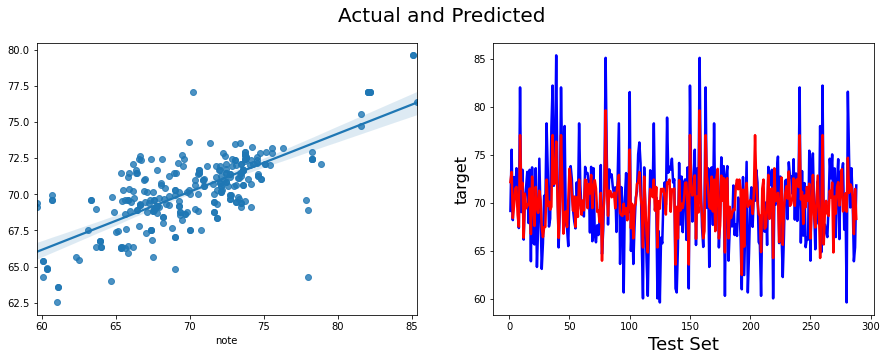

In [83]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
vot=VotingRegressor([('lr', r1), ('rf', r2)])
vot.fit(X_train, y_train)
evaluate(vot)

## StackingRegressor

StackingRegressor
explained_variance:  0.0739
mean_squared_log_error:  0.0042
r2:  0.0739
MAE:  3.5115
MSE:  21.1746
RMSE:  4.6016


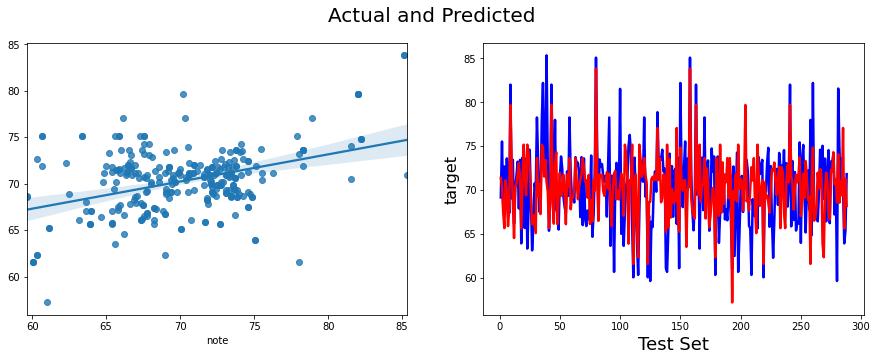

In [84]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]
Stackingreg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
evaluate(Stackingreg)

## ExtraTreesRegressor

ExtraTreesRegressor
explained_variance:  0.5882
mean_squared_log_error:  0.0019
r2:  0.5882
MAE:  2.0828
MSE:  9.416
RMSE:  3.0686


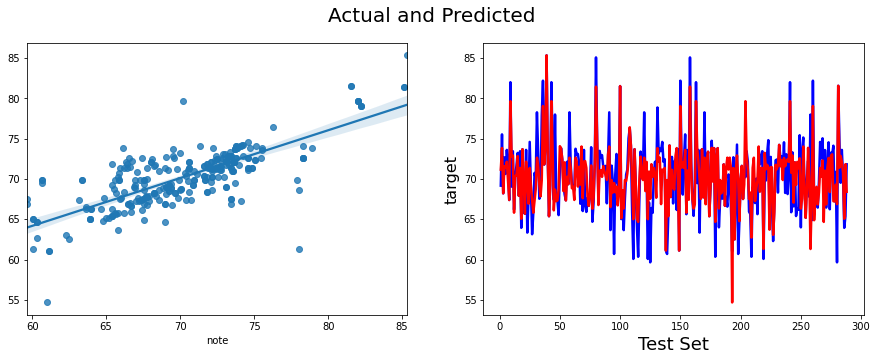

In [85]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(X_train, y_train)
evaluate(ext)

## XGBRegressor

In [86]:
from xgboost import XGBRegressor
xgboost_1 = XGBRegressor(random_state=0)

xgboost_1.fit(X_train, y_train)
xgboost_1.predict(X_test)
xgboost_1.score(X_test,y_test)

0.5807529507957423

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate' : [0.1, 0.08, 0.05, 0.03, 0.01], 'n_estimators' : [50, 100, 200, 500, 700, 1000]}
grid = GridSearchCV(XGBRegressor(), param_grid, cv = 5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [88]:
grid.best_score_

0.5439290354513739

In [89]:
grid.best_params_

{'learning_rate': 0.08, 'n_estimators': 200}

In [90]:
grid.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

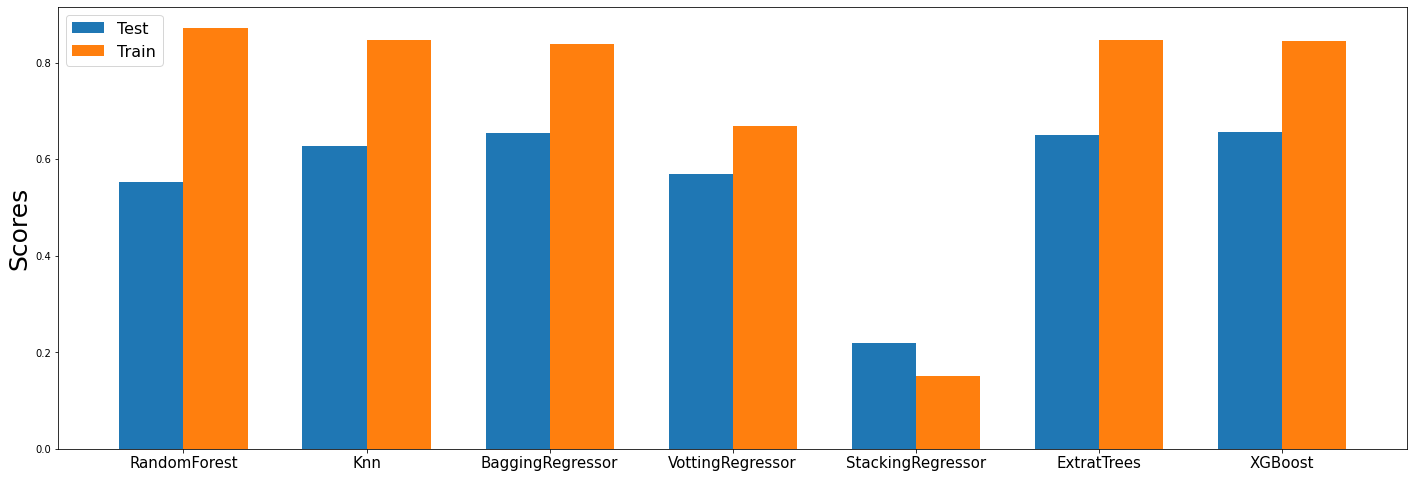

In [113]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['RandomForest', 'Knn', 'BaggingRegressor', 'VottingRegressor','StackingRegressor','ExtratTrees','XGBoost']


test = [testRandom, testKnn, testbag, testvot,testStackingreg,testext,testxgboost_1]
train = [trainRandom, trainKnn, trainbag,trainvot,trainStackingreg,trainext,trainxgboost_1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, test, width, label='Test')
rects2 = ax.bar(x + width/2, train, width, label='Train')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores',fontsize = 25)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize = 15)
ax.legend(fontsize = 16)
fig.set_figheight(7)
fig.set_figwidth(20)
fig.tight_layout(pad=2,h_pad=3,w_pad=3)
fig.savefig('comp1.jpg')
plt.show()
